In [4]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("../datas/netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [8]:
movies_90s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] <= 1999) & 
                        (netflix_df['type'] == 'Movie')].copy()
movies_90s['duration'] = movies_90s['duration'].astype(int)

duration = movies_90s['duration'].mode()[0]

short_action_movies = movies_90s[(movies_90s['duration'] < 90) & 
                                 (movies_90s['genre'].str.contains('Action', na=False))]
short_movie_count = short_action_movies.shape[0]
movies_90s.describe(include='all')
movies_90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


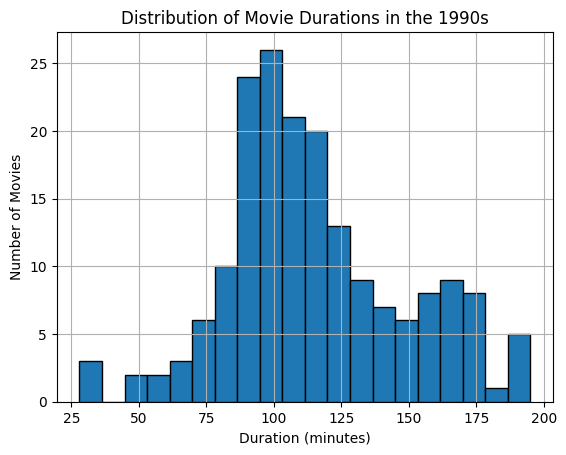

In [9]:
plt.hist(movies_90s['duration'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

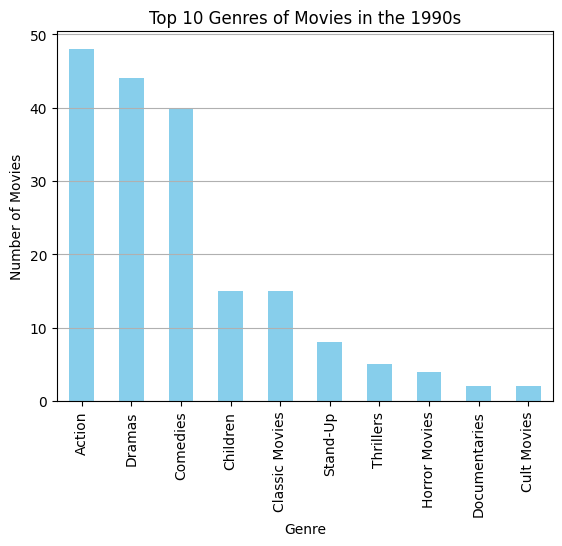

In [10]:
genre_counts = movies_90s['genre'].value_counts().head(10)
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres of Movies in the 1990s')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()

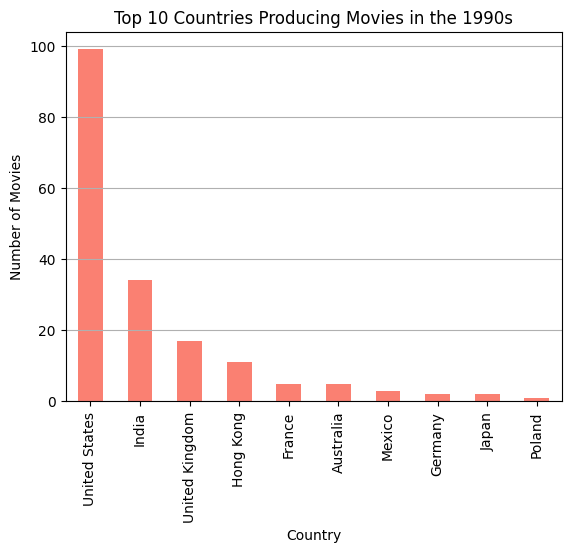

In [11]:
country_counts = movies_90s['country'].value_counts().head(10)
country_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries Producing Movies in the 1990s')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()

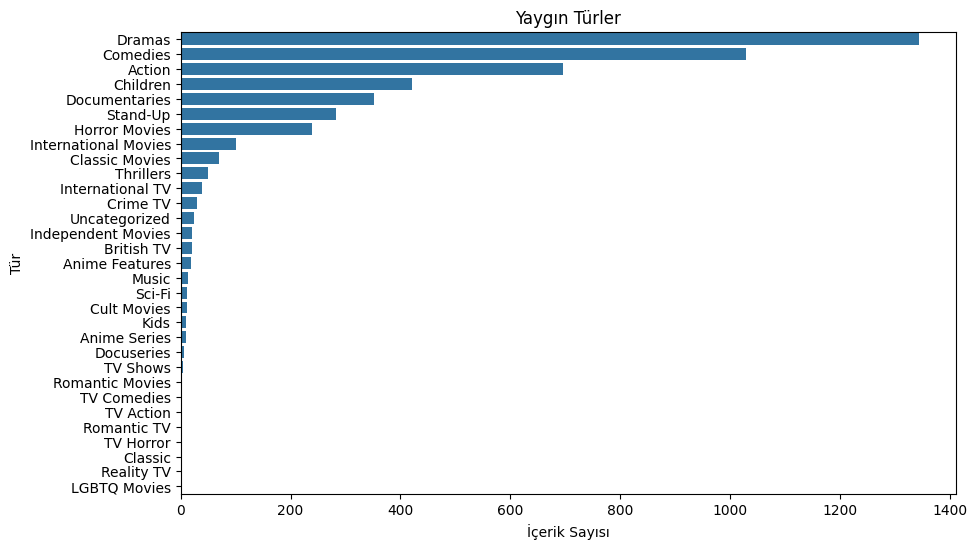

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(y='genre', data=netflix_df, order=netflix_df['genre'].value_counts().index)
plt.title('Yaygın Türler')
plt.xlabel('İçerik Sayısı')
plt.ylabel('Tür')
plt.show()


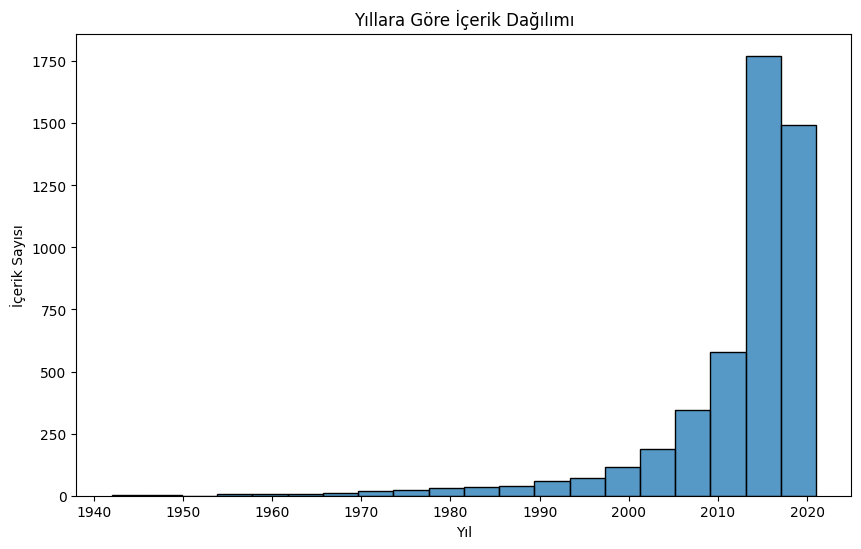

In [10]:
netflix_df['release_year'] = netflix_df['release_year'].astype(int)
plt.figure(figsize=(10,6))
sns.histplot(netflix_df['release_year'], bins=20, kde=False)
plt.title('Yıllara Göre İçerik Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.show()


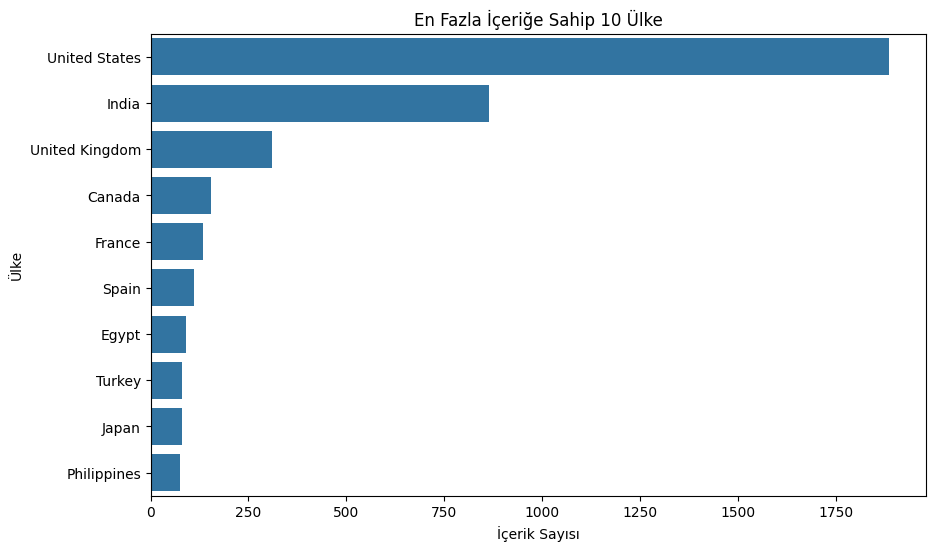

In [11]:
top_countries = netflix_df['country'].value_counts().nlargest(10).index
plt.figure(figsize=(10,6))
sns.countplot(y='country', data=netflix_df[netflix_df['country'].isin(top_countries)], 
              order=netflix_df['country'].value_counts().nlargest(10).index)
plt.title('En Fazla İçeriğe Sahip 10 Ülke')
plt.xlabel('İçerik Sayısı')
plt.ylabel('Ülke')
plt.show()


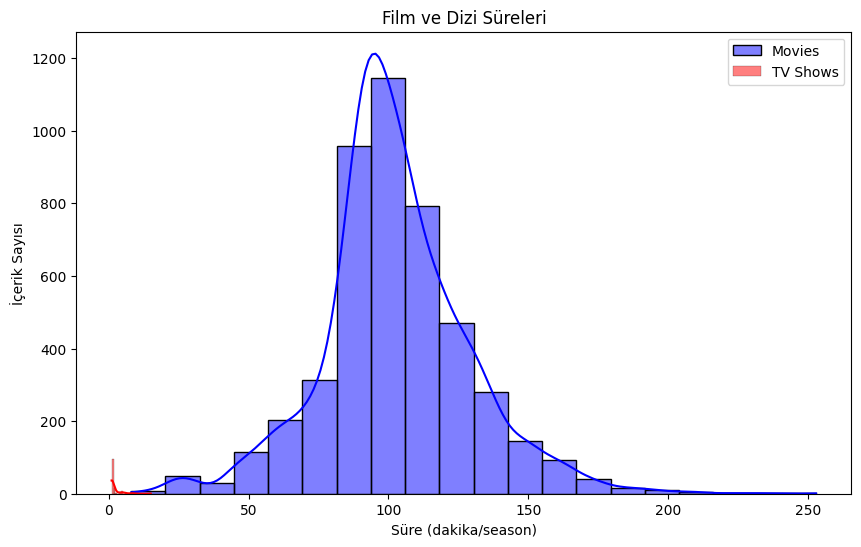

In [12]:
# Verilerin sayısal olduğunu doğrulama
netflix_df['duration'] = pd.to_numeric(netflix_df['duration'], errors='coerce')

# Filmler ve TV Dizileri için ayrı ayrı verileri ayırma
movies = netflix_df[netflix_df['type'] == 'Movie']
shows = netflix_df[netflix_df['type'] == 'TV Show']

# Sürelerin dağılımı
plt.figure(figsize=(10,6))
sns.histplot(movies['duration'], bins=20, color='blue', label='Movies', kde=True)
sns.histplot(shows['duration'], bins=20, color='red', label='TV Shows', kde=True)
plt.title('Film ve Dizi Süreleri')
plt.xlabel('Süre (dakika/season)')
plt.ylabel('İçerik Sayısı')
plt.legend()
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression

# Türlere göre içerik sayısını yıllara göre tahmin etme
genre_yearly = netflix_df.groupby(['release_year', 'genre']).size().unstack(fill_value=0)
X = genre_yearly.index.values.reshape(-1, 1)  # Yıllar
y = genre_yearly  # Türlere göre içerik sayısı

model = LinearRegression()
model.fit(X, y)

# Örnek: 2025 için türlere göre içerik sayısını tahmin etme
future_year = [[2025]]
predicted_counts = model.predict(future_year)
predicted_df = pd.DataFrame(predicted_counts, columns=genre_yearly.columns)
predicted_df['Year'] = 2025
print(predicted_df)


genre     Action  Anime Features  Anime Series  British TV   Children  \
0      29.996302        0.930532      0.431932    0.993712  19.775701   

genre   Classic  Classic Movies   Comedies  Crime TV  Cult Movies  ...  \
0      0.054209        0.126087  48.351644  1.598903     0.271297  ...   

genre  Romantic TV    Sci-Fi   Stand-Up  TV Action  TV Comedies  TV Horror  \
0           0.0554  0.534398  14.097212    0.10961     0.161438   0.049447   

genre  TV Shows  Thrillers  Uncategorized  Year  
0      0.209695   2.364592       1.179043  2025  

[1 rows x 32 columns]


In [15]:
# En popüler 10 yönetmen ve yönettikleri içerik sayısı
top_directors = netflix_df['director'].value_counts().nlargest(10)
top_directors_df = netflix_df[netflix_df['director'].isin(top_directors.index)]
director_genre_counts = top_directors_df.groupby(['director', 'genre']).size().unstack(fill_value=0)
print(director_genre_counts)


genre                   Action  Children  Classic Movies  Comedies  \
director                                                             
Cathy Garcia-Molina          0         0               0         7   
David Dhawan                 2         0               0         7   
Hakan Algül                  0         0               0         8   
Jay Chapman                  0         0               0         0   
Jay Karas                    0         1               0         0   
Marcus Raboy                 0         0               0         0   
Martin Scorsese              0         1               6         0   
Raúl Campos, Jan Suter       0         0               0         0   
Steven Spielberg             4         2               1         0   
Youssef Chahine              1         0               7         0   

genre                   Documentaries  Dramas  International Movies  Stand-Up  
director                                                                       

In [16]:
# Filmler ve diziler için ortalama süreler
avg_movie_duration = movies.groupby('genre')['duration'].mean()
avg_show_duration = shows.groupby('genre')['duration'].mean()

print('Film Türlerine Göre Ortalama Süreler:')
print(avg_movie_duration)
print('\nDizi Türlerine Göre Ortalama Sezon Süreleri:')
print(avg_show_duration)


Film Türlerine Göre Ortalama Süreler:
genre
Action                  113.158046
Anime Features           96.222222
Children                 83.244656
Classic Movies          118.434783
Comedies                107.184645
Cult Movies             103.636364
Documentaries            84.971591
Dramas                  111.796724
Horror Movies            97.033473
Independent Movies       98.700000
International Movies    112.240000
LGBTQ Movies             99.000000
Music                    90.500000
Romantic Movies          83.333333
Sci-Fi                  108.090909
Stand-Up                 66.561594
Thrillers                97.244898
Uncategorized            53.160000
Name: duration, dtype: float64

Dizi Türlerine Göre Ortalama Sezon Süreleri:
genre
Anime Series         2.666667
British TV           2.550000
Classic             15.000000
Crime TV             1.700000
Docuseries           1.142857
International TV     1.410256
Kids                 1.500000
Reality TV           2.000000
Rom